#### Non Linear Equation Solving: [ch2: Numerical Methods]


Let's consider a function $f(x)$ whose derivative is $f^{\prime}(x)$:
$$
f(x) = \sin(x) + \cos(x)^2 + 1 \\
f^{\prime}(x) = \cos(x) - 2 \cos(x) \sin(x)
$$


Step 0: Define Function and It's derivative

In [2]:
import numpy as np

def f(x):
    return np.sin(x) + np.cos(x)**2 + 1 

def fprime(x):
    return np.cos(x) - 2 * np.cos(x) * np.sin(x)


Step 1: Visualize the function:

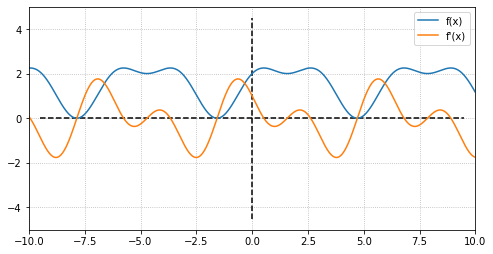

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.grid(linestyle="dotted")

# plotting graph settings:
xb = [-10, 10] # represents x axis bound
yb = [-5, 5] # represents y axis bound
ag = 0.5       # gap of axis line from border of graph

# define limits and make axis line:
plt.ylim(yb)
plt.xlim(xb)
plt.plot([ xb[0] + ag, xb[1] - ag ],[0,0], linestyle='--', color='k')
plt.plot([0,0], [yb[0] + ag, yb[1] - ag], linestyle='--', color='k')

#plot function f
x = np.linspace(-10, 10, 100000)
y = f(x)
ax.plot(x,y, label="f(x)")

#plot function fprime
y2 = fprime(x)
ax.plot(x,y2, label="f'(x)")


plt.legend()
plt.show()

Step 2: Make Inital Guess according to plots. <br>
Step 3: Try newton() function with various initial guess.

#### Reference:
```scipy.optimize.newton(f, initial_guess, fprime="None") ``` <br> function documentation: <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html

In [4]:
import scipy.optimize as opt

In [5]:
# secant method
opt.newton(f, 5)

4.712389000075041

In [6]:
#newton's method:
opt.newton(f, 5.0, fprime=fprime)

4.712388988619138

#### Sytem of Linear Algebric equations: [ch3: Numerical Methods]
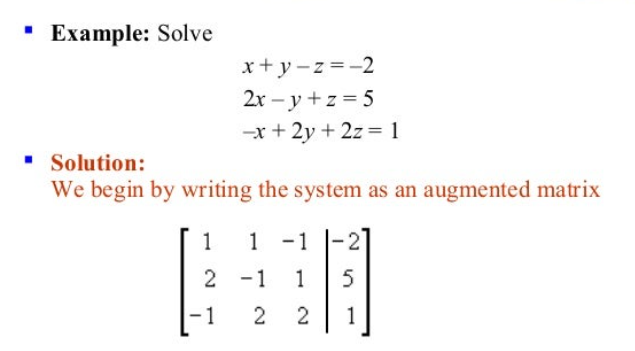

Reference: <br>
Function: ``` scipy.linalg.inv(A).dot(Y)  ``` <br>
Scipy Linear Algebra (scipy.linalg)  documentation:<br>
https://docs.scipy.org/doc/scipy/reference/linalg.html

In [26]:
import scipy.linalg as alg
A = [[1,1,-1],
     [2, -1, 1],
     [-1, 2, 2]
    ]
Y = [-2, 5, 1]

# Equation of simultaneous problem:
# A X = Y
# X = A^-1 . Y

res  = alg.inv(A).dot(Y)

for i in res:
    print(round(i, 3))

1.0
-1.0
2.0


---

Find eigen value and eigen vector of matrix A given below: <br>
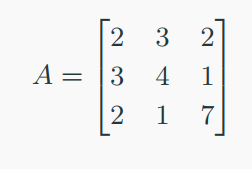


Reference: <br>
Function: ``` scipy.linalg.eig(A)``` <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html

In [8]:
A = [[2,3,3],
     [3,4,1],
     [2,1,7]
    ]
alg.eig(A)


(array([-0.44948974+0.j,  9.        +0.j,  4.44948974+0.j]),
 array([[ 0.83497188, -0.50789938, -0.29837704],
        [-0.52853149, -0.45146612, -0.78562471],
        [-0.15322019, -0.73363244,  0.54200088]]))

#### Curve Fitting: (Ch4: Numerical Methods)


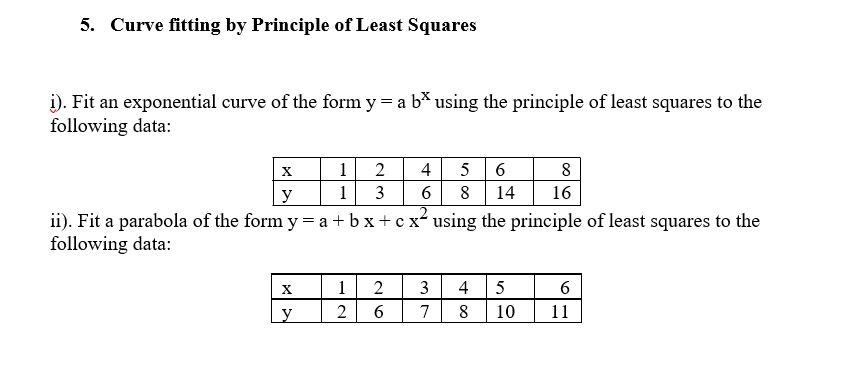


(i) we will be fitting it for y = a + bx

---

References:<br>
Function: ``` numpy.polyfit(x,y,deg)``` <br>
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
<br>
Fit a polynomial ``` p(x) = p[0] * x**deg + ... + p[deg] ``` of degree deg to points ```(x, y)```. <br>

Returns a vector of coefficients p that minimises the squared error in the order ```deg, deg-1, … 0```.



In [9]:
import numpy as np

In [10]:
x = np.array([1,2,4,5,6,8])
y = np.array([1,3,6,8,14,16])

In [11]:
ab = np.polyfit(x,y,1)
ab

array([ 2.25, -1.75])

In [12]:
print("y = ", round(ab[0], 3), "x + ", round(ab[1], 3))

y =  2.25 x +  -1.75


---

y = a + bx + c x^2

In [13]:
x = np.array([1,2,3,4,5,6])
y = np.array([2,6,7,8,10,11])


c, b, a = np.polyfit(x,y,2)


print("y = ", round(a,3)," + ", round(b,3),"x + ", round(c,3),"x^2")

y =  -0.3  +  3.032 x +  -0.196 x^2


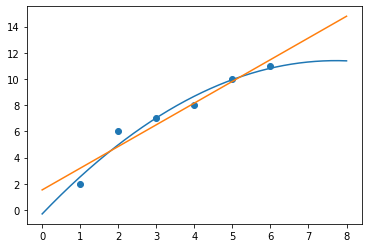

In [14]:
import matplotlib.pyplot as plt

#simple plotting:
plt.scatter(x,y)

m = np.linspace(0, 8, 1000)
n = a + b*m + c * m**2
plt.plot( m,n)



# linear
b, a = np.polyfit(x, y, 1)

n = a + b * m
plt.plot(m,n)


#### Interpolation: (Ch4: Numerical Methods)

Reference:<br>
Function: ```f = scipy.interpolate.interp1d(x, y, kind='linear') ``` <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d

In [16]:
x,y

(array([1, 2, 3, 4, 5, 6]), array([ 2,  6,  7,  8, 10, 11]))

In [17]:
import matplotlib.pyplot as plt
import scipy.interpolate as pol

fs = pol.interp1d(x,y, kind='quadratic')

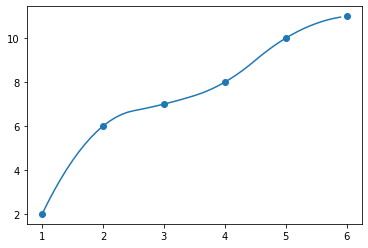

In [18]:
plt.scatter(x,y)

m = np.arange(1,6,0.1)
n = fs(m)
plt.plot(m,n)


#### Differentiation and Integration: (Ch5: Numerical Methods)
Reference1: <br>
Function: ```scipy.misc.derivative(func, x0, dx=1.0, n=1) ``` <br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy-misc-derivative


Reference2: <br>
Function: ```scipy.integrate.quad(func, a, b) ``` <br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html#scipy-misc-derivative


In [19]:
# a different style of importing functions.
from scipy.misc import derivative
from scipy.integrate import quad

def f(x):
    return np.sin(x) + np.cos(x)**2 + 1 


print("D=", derivative(fs, 5, dx = 0.0001))

print("I=", quad(fs, 1, 4) )


D= 1.6789215686152659
I= (18.344362747673387, 1.2903180598998794e-07)


.

In [20]:
# compare with analytical answer.
import sympy as sp
x = sp.symbols("x")
a,b = sp.symbols("a, b", constant = True)
f = sp.sin(x) + sp.cos(x)**2 +1

print("Derivative (at x = 5):")
display( sp.Derivative(f,x).doit().subs(x,5).n()  )

print("Integration (1->4):")
display( sp.Integral(f,(x, a, b)).doit().subs([ (a, 1), (b, 4) ]).n() )

Derivative (at x = 5):


0.827683296352596

Integration (1->4):


5.71396113168118

---

#### Solution of ODE: ( Ch6: Numerical Methods)

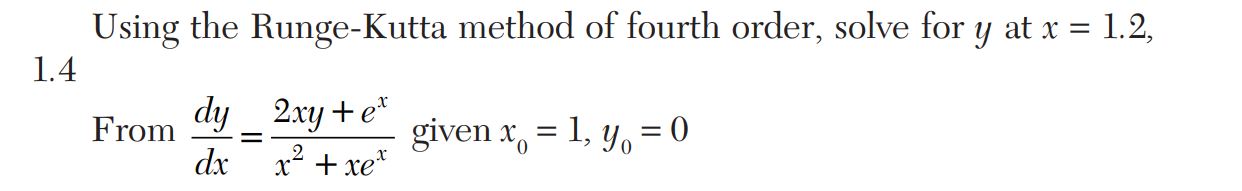


Reference1: <br>
```scipy.integrate.ode(f)``` <br>
Solve an equation system $ y^{\prime}(t) = f(t,y)$.


In [21]:
import numpy as np
from scipy.integrate import ode

# Two methods of importing library function:

# from scipy.integrate import ode
# ode()

# import scipy.integrate as ig
# ig.ode()

In [22]:
def f(x,y):
    return (2*x*y + np.exp(x) )/( x**2 + x* np.exp(x) )


In [23]:
r = ode(f)

We use ```set_initial_value(y, t)``` method to define initial conditions.

In [24]:
r.set_initial_value(0, 1)


We use ```set_integrator(methodname)``` method to define method of solving ODE.

``` integrate(t2)```

In [27]:
r.set_integrator('dopri5')

r.integrate(1.2)
r.integrate(1.4)

array([0.2704981])